In [19]:
from __future__ import print_function
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from scipy.io import loadmat


In [20]:
mat3 = loadmat('ex6data3.mat')
X3 = mat3["X"] #shape 211x2
y3 = mat3["y"] #shape 211x1

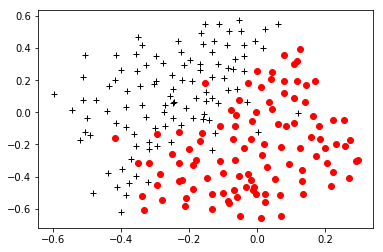

In [21]:
def plotData(X,y):
    y=y.flatten()
    class1= y==1
    class2= y==0
    plt.plot(X[:,0][class1],X[:,1][class1],"k+")
    plt.plot(X[:,0][class2],X[:,1][class2],"ro")
    
plotData(X3,y3)

In [24]:
def svmTrainLinear(X,y,C,kernel):
    y=y.flatten()
    clf=svm.SVC(C=C,kernel=kernel)
    return clf.fit(X,y)

def visualizeLine(X,y,model):
    plotData(X,y)
    w=model.coef_[0]
    b=model.intercept_[0]
    xp=np.linspace(X[:,0].min(),X[:,0].max(),100)
    yp=-(w[0]*xp+b)/w[1]
    plt.plot(xp,yp,'r-')
    plt.show()
    

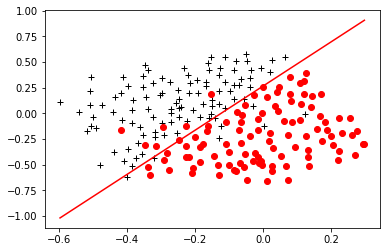

In [25]:
C=1000
linearmodel=svmTrainLinear(X3,y3,C,"linear")
visualizeLine(X3,y3,linearmodel)

In [29]:
def visualizeboundary(X2,y2,model):
    plotData(X2,y2)
    X_21,X_22=np.meshgrid(np.linspace(X2[:,0].min(),X2[:,0].max(),num=100),np.linspace(X2[:,1].min(),X2[:,1].max(),num=100))
    plt.contour(X_21,X_22,model.predict(np.array([X_21.ravel(),X_22.ravel()]).T).reshape(X_21.shape),1,colors="b")

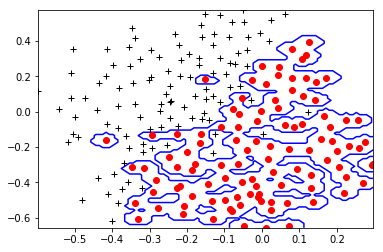

In [35]:
model=SVC(kernel="rbf",gamma=3000)
model.fit(X3,y3.ravel())
visualizeboundary(X3, y3, model)